# Several time steps

In [12]:
import resiliencyTool as rt
import pandas as pd
# import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from pandapower.plotting.plotly import simple_plotly, vlevel_plotly, pf_res_plotly
from utils import * # pplotting functions
import warnings
warnings.simplefilter("ignore") # warning are ignored for now

Example of simulations featuring different time resolutions

### Case 1: 40 time steps with 1-hour resolution

In [13]:
simulationName = 'different_time_steps_v0'
df = pd.read_csv(rt.config.path.engineDatabaseFile(simulationName), index_col = [0, 1, 2, 3])
df.columns

Index(['2022-01-01 01:00:00', '2022-01-01 02:00:00', '2022-01-01 03:00:00',
       '2022-01-01 04:00:00', '2022-01-01 05:00:00', '2022-01-01 06:00:00',
       '2022-01-01 07:00:00', '2022-01-01 08:00:00', '2022-01-01 09:00:00',
       '2022-01-01 10:00:00', '2022-01-01 11:00:00', '2022-01-01 12:00:00',
       '2022-01-01 13:00:00', '2022-01-01 14:00:00', '2022-01-01 15:00:00',
       '2022-01-01 16:00:00', '2022-01-01 17:00:00', '2022-01-01 18:00:00',
       '2022-01-01 19:00:00', '2022-01-01 20:00:00', '2022-01-01 21:00:00',
       '2022-01-01 22:00:00', '2022-01-01 23:00:00', '2022-01-02 00:00:00',
       '2022-01-02 01:00:00', '2022-01-02 02:00:00', '2022-01-02 03:00:00',
       '2022-01-02 04:00:00', '2022-01-02 05:00:00', '2022-01-02 06:00:00',
       '2022-01-02 07:00:00', '2022-01-02 08:00:00', '2022-01-02 09:00:00',
       '2022-01-02 10:00:00', '2022-01-02 11:00:00', '2022-01-02 12:00:00',
       '2022-01-02 13:00:00', '2022-01-02 14:00:00', '2022-01-02 15:00:00',
       '2022

In [14]:

df = pd.read_csv(rt.config.path.engineDatabaseFile(simulationName), index_col = [0, 1, 2, 3]) # read database with results
df_load = group_by(filter(df, type = 'load'), 'sum', 'iteration', 'field', 'type')
df_load = invert(df_load)
df.loc[:,'energy_not_served_mwh','network'].sum(axis = 1)

iteration  id 
0          NaN      0.000000
1          NaN    391.937732
dtype: float64

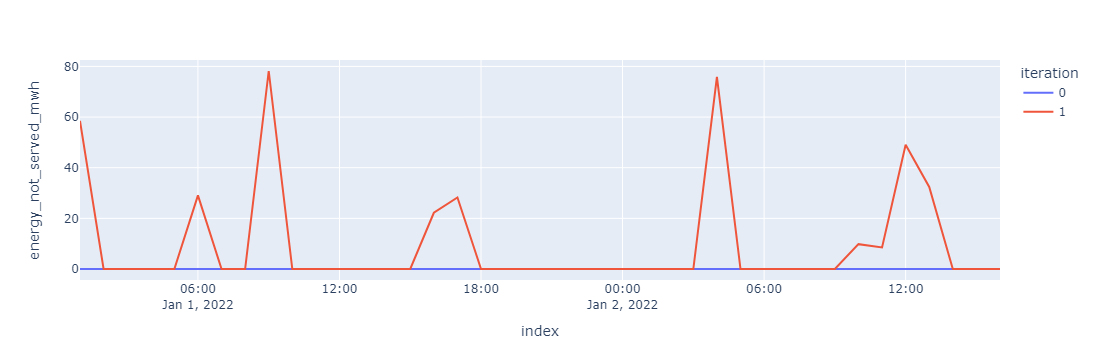

In [15]:
px.line(df_load, x=df_load.index, y = 'energy_not_served_mwh', color = 'iteration')

### Case 2: 80 time steps with 30-mins resolution

In [16]:
simulationName = 'different_time_steps_v1'
df = pd.read_csv(rt.config.path.engineDatabaseFile(simulationName), index_col = [0, 1, 2, 3]) # read database with results
df.columns

Index(['2022-01-01 01:00:00', '2022-01-01 01:30:00', '2022-01-01 02:00:00',
       '2022-01-01 02:30:00', '2022-01-01 03:00:00', '2022-01-01 03:30:00',
       '2022-01-01 04:00:00', '2022-01-01 04:30:00', '2022-01-01 05:00:00',
       '2022-01-01 05:30:00', '2022-01-01 06:00:00', '2022-01-01 06:30:00',
       '2022-01-01 07:00:00', '2022-01-01 07:30:00', '2022-01-01 08:00:00',
       '2022-01-01 08:30:00', '2022-01-01 09:00:00', '2022-01-01 09:30:00',
       '2022-01-01 10:00:00', '2022-01-01 10:30:00', '2022-01-01 11:00:00',
       '2022-01-01 11:30:00', '2022-01-01 12:00:00', '2022-01-01 12:30:00',
       '2022-01-01 13:00:00', '2022-01-01 13:30:00', '2022-01-01 14:00:00',
       '2022-01-01 14:30:00', '2022-01-01 15:00:00', '2022-01-01 15:30:00',
       '2022-01-01 16:00:00', '2022-01-01 16:30:00', '2022-01-01 17:00:00',
       '2022-01-01 17:30:00', '2022-01-01 18:00:00', '2022-01-01 18:30:00',
       '2022-01-01 19:00:00', '2022-01-01 19:30:00', '2022-01-01 20:00:00',
       '2022

In [17]:
df_load = group_by(filter(df, type = 'load'), 'sum', 'iteration', 'field', 'type')
df_load = invert(df_load)
df.loc[:,'energy_not_served_mwh','network'].sum(axis = 1)

iteration  id 
0          NaN      0.000000
1          NaN    391.937732
dtype: float64

**Observation**: total loss of load is equals that of the first case, as curves shapes are equivalent

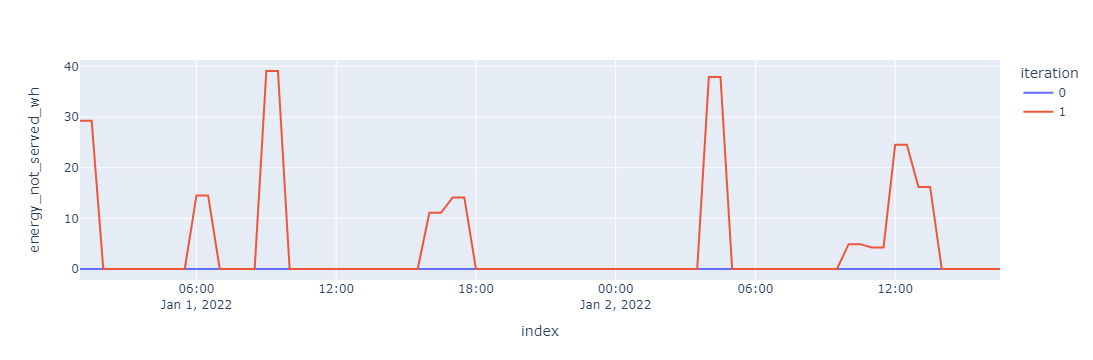

In [18]:
px.line(df_load, x=df_load.index, y = 'energy_not_served_wh', color = 'iteration')

In [19]:
### Case 3: 40 time steps with 12-hours resolution

In [20]:
simulationName = 'different_time_steps_v2'
df = pd.read_csv(rt.config.path.engineDatabaseFile(simulationName), index_col = [0, 1, 2, 3]) # read database with results
df.columns

Index(['2022-01-01 12:00:00', '2022-01-02 00:00:00', '2022-01-02 12:00:00',
       '2022-01-03 00:00:00', '2022-01-03 12:00:00', '2022-01-04 00:00:00',
       '2022-01-04 12:00:00', '2022-01-05 00:00:00', '2022-01-05 12:00:00',
       '2022-01-06 00:00:00', '2022-01-06 12:00:00', '2022-01-07 00:00:00',
       '2022-01-07 12:00:00', '2022-01-08 00:00:00', '2022-01-08 12:00:00',
       '2022-01-09 00:00:00', '2022-01-09 12:00:00', '2022-01-10 00:00:00',
       '2022-01-10 12:00:00', '2022-01-11 00:00:00', '2022-01-11 12:00:00',
       '2022-01-12 00:00:00', '2022-01-12 12:00:00', '2022-01-13 00:00:00',
       '2022-01-13 12:00:00', '2022-01-14 00:00:00', '2022-01-14 12:00:00',
       '2022-01-15 00:00:00', '2022-01-15 12:00:00', '2022-01-16 00:00:00',
       '2022-01-16 12:00:00', '2022-01-17 00:00:00', '2022-01-17 12:00:00',
       '2022-01-18 00:00:00', '2022-01-18 12:00:00', '2022-01-19 00:00:00',
       '2022-01-19 12:00:00', '2022-01-20 00:00:00', '2022-01-20 12:00:00',
       '2022

In [21]:
df_load = group_by(filter(df, type = 'load'), 'sum', 'iteration', 'field', 'type')
df_load = invert(df_load)
df.loc[:,'energy_not_served_mwh','network'].sum(axis = 1)

iteration  id 
0          NaN       0.00000
1          NaN    4703.25278
dtype: float64

**Observation**: total loss of load is  12 times higher than the first case, as curves shapes are equivalent but their duration is 12 hours

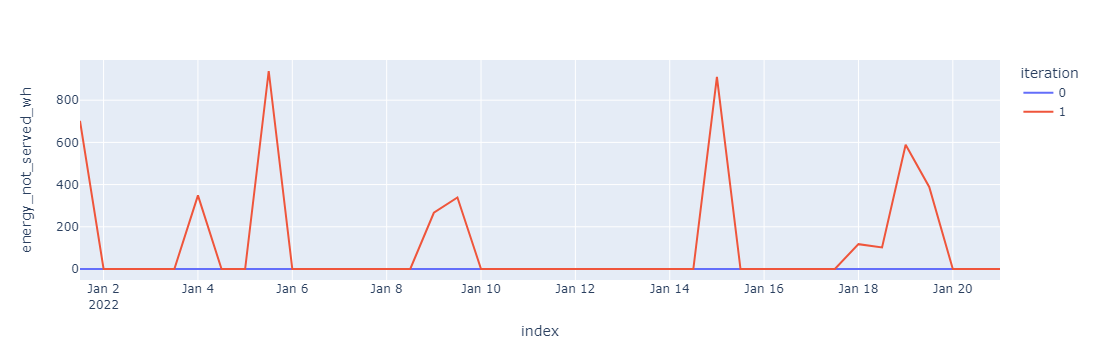

In [22]:
px.line(df_load, x=df_load.index, y = 'energy_not_served_wh', color = 'iteration')